## MACS30000 Assignment 4: Simulation
### Leoson Hoay

## Contents:
* [Problem 1](#Problem-1:)
* [Problem 2](#Problem-2:)
* [Problem 3](#Problem-3:)
* [Problem 4](#Problem-4:)


**Importing necessary packages:**

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plot
from matplotlib.ticker import MultipleLocator

## Problem 1:

**Define given parameters:**

In [2]:
start_year = 2019
inc_0 = 80000
sd = 0.1
p = 0.2
g = 0.03
mean = 0
num_years = 40

In [3]:
np.random.seed(171276)

**Draw 10,000 sets of error terms**:

In [4]:
errors = np.random.normal(mean, sd, (num_years, 10000))

**Define simulation function**:

In [5]:
def inc_sim(errors, initial_income):
    ln_income = np.zeros((num_years, 10000))
    ln_income[0, :] = np.log(initial_income) + errors[0, :]
    
    for year in range(1, num_years):
        ln_income[year, :] = ((1-p)) * (np.log(initial_income) + g * year) + p * (ln_income[year - 1, :]) + errors[year, :]
        
    income_mat = np.exp(ln_income)
    
    return income_mat

**Run simulation function:**

In [6]:
inc_mat = inc_sim(errors, inc_0)

**Plot of a single lifetime path**:

Text(0,0.5,'Income ($)')

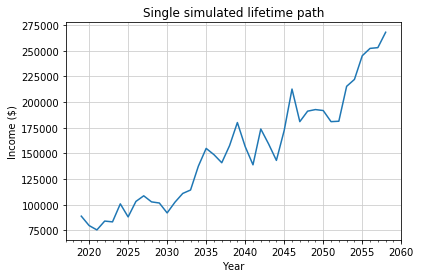

In [7]:
%matplotlib inline
year_vec = np.arange(start_year, start_year + num_years)
individual = 500
fig, ax = plot.subplots()
plot.plot(year_vec, inc_mat[:, individual])
minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
plot.grid(b=True, which='major', color='0.80', linestyle='-')
plot.title('Single simulated lifetime path', fontsize=12)
plot.xlabel(r'Year')
plot.ylabel(r'Income ($)')

## Problem 2:

**Initializing required variables:**

In [8]:
initial_inc = inc_mat[0, :]
mean_hist = np.mean(initial_inc)
sd_hist = np.sqrt(np.var(initial_inc))

**Plotting histogram**:

Text(0.5,1,'Distribution of Simulated Income at Year = 2019')

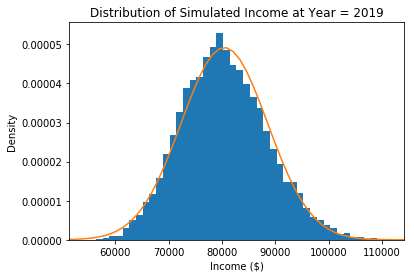

In [9]:
%matplotlib inline
plot.hist(initial_inc, 50, normed = True)
plot.xlim((min(initial_inc)), max(initial_inc))
x = np.linspace(min(initial_inc), max(initial_inc), 50)
plot.plot(x, stats.norm.pdf(x, mean_hist, sd_hist))
plot.xlabel(r'Income ($)')
plot.ylabel(r'Density')
plot.title('Distribution of Simulated Income at Year = 2019', fontsize = 12)

In [10]:
p100_a = 100 - stats.percentileofscore(initial_inc, 100000)
p70_b = stats.percentileofscore(initial_inc, 70000)
print(p100_a)
print(p70_b)

1.25
9.16


**1.25 % of the class will earn more than $100, 000 in the first year.**

**9.16 % of the class will earn less than $70, 000 in the first year.**

**It is clear from the plot that the distribution is bell-shaped and relatively symmetric, and hence is normal.**

## Problem 3:

**Intializing given parameters**:

In [11]:
debt = 95000
repay_rate = 0.1

**Define debt repayment function**:

In [12]:
def compute_repayment_years(draws, num_years, start_year, mat):
    required_years = []
    
    for draw in range(draws):
        year_debt = debt
        for years in range(num_years):
            if year_debt > 0:
                year_debt = year_debt - repay_rate*mat[years, draw]
            else: 
                required_years.append(years)
                break
                
    return required_years

**Plot histogram:**

In [13]:
repayment_times = compute_repayment_years(10000, num_years, start_year, inc_mat)

Text(0.5,1,'Histogram of Densities of Debt Repayment Times on a $95,000 loan')

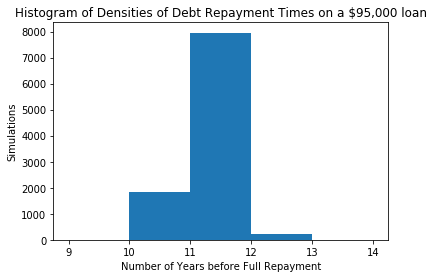

In [14]:
plot.hist(repayment_times, 
         bins = np.arange(min(repayment_times) - 1, max(repayment_times) + 3, 1))
plot.xlabel(r'Number of Years before Full Repayment')
plot.ylabel(r'Simulations')
plot.xticks(np.arange(min(repayment_times) - 1, max(repayment_times) + 3))
plot.title('Histogram of Densities of Debt Repayment Times on a $95,000 loan', fontsize = 12)

In [15]:
less_than_11 = [years for years in repayment_times if years <= 10]
print((len(less_than_11)/len(repayment_times)) * 100)

18.42


**In 18.42% of simulations, the debt is repaid in 10 years.**

## Problem 4:

**Due to the MACSS program increasing in prestige, variables must be reinitialized.**

In [16]:
new_inc_0 = 85000
new_sd = 0.15
new_errors = np.random.normal(mean, new_sd, (num_years, 10000))

**Rerun simulation:**

In [17]:
new_inc_mat = inc_sim(new_errors, new_inc_0)

**Recompute loan repayment, and generate repayment histogram:**

Text(0.5,1,'Histogram of Densities of Debt Repayment Times on a $95,000 loan (Parallel World)')

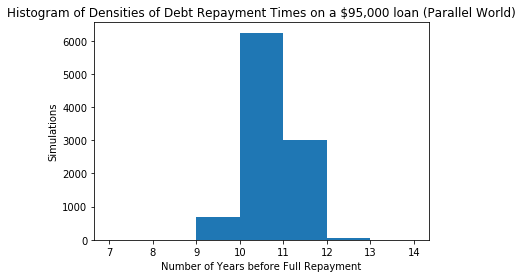

In [18]:
new_repayment_times = compute_repayment_years(10000, num_years, start_year, new_inc_mat)

plot.hist(new_repayment_times, 
         bins = np.arange(min(new_repayment_times) - 1, max(new_repayment_times) + 3, 1))
plot.xlabel(r'Number of Years before Full Repayment')
plot.ylabel(r'Simulations')
plot.xticks(np.arange(min(new_repayment_times) - 1, max(new_repayment_times) + 3))
plot.title('Histogram of Densities of Debt Repayment Times on a $95,000 loan (Parallel World)', fontsize = 12)

In [19]:
less_than_11 = [years for years in new_repayment_times if years <= 10]
print((len(less_than_11)/len(new_repayment_times)) * 100)

69.16


**The increased prestige of the MACSS program translates to 69.16% of the simulations having the debt fully repaid in 10 years.**